In [2]:
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

import os
import utils

In [3]:
AUDIO_DIR = "..\\fma_small"
META_DIR = "..\\fma_metadata\\"

In [63]:
# Load metadata to memory
def load_meta_data(): 
    tracks_all   = utils.load(META_DIR + '\\tracks.csv')
    features_all = utils.load(META_DIR + '\\features.csv')
    echonest_all = utils.load(META_DIR + '\\echonest.csv')

    #genres = utils.load(META_DIR + 'genres.csv')

    np.testing.assert_array_equal(features_all.index, tracks_all.index)
    assert echonest_all.index.isin(tracks_all.index).all()
    
    
    return tracks_all, features_all, echonest_all

# Choose Subset
def choose_small_subset(tracks_all, features_all, echonest_all):
    subset = tracks_all.index[tracks_all['set', 'subset'] <= 'small']

    assert subset.isin(tracks_all.index).all()
    assert subset.isin(features_all.index).all()
    
    tracks = tracks_all.loc[subset]
    features = features_all.loc[subset]

    return tracks, features

In [64]:
tracks_all, features_all, echonest_all = load_meta_data()
tracks, features =  choose_small_subset(tracks_all, features_all, echonest_all)

D:\Dropbox\172B Big\Amadeus\fma_code\utils.py:214: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


### Playing around with visualizations

In [70]:
genre_list = list(set(tracks[("track","genre_top")]))
genre_indexes = [tracks.index[tracks['track','genre_top'] == g]  for g in genre_list]

In [188]:
music_ids = []
for i in range(len(genre_list)):
    n = genre_indexes[i].shape[0]
    j = np.random.randint(0, n)
    music_ids.append(genre_indexes[i][j])

In [189]:
music_ids

[116868, 62596, 132454, 147267, 47192, 127181, 113311, 145918]

In [190]:
sample_audios = []
Xs = []
sample_rates = []
for i in range(len(music_ids)):
    sample_audio = utils.get_audio_path(AUDIO_DIR, music_ids[i])
    cur_x, cur_sr = librosa.load(sample_audio)
    
    sample_audios.append(sample_audio)
    Xs.append(cur_x)
    sample_rates.append(cur_sr)

In [221]:
ipd.Audio(Xs[7], rate = sample_rates[7])

### Play random song and guess genre

In [235]:
inds = tracks.index
j = np.random.randint(0, len(inds))
sample_audio = utils.get_audio_path(AUDIO_DIR, inds[j])
cur_x, cur_sr = librosa.load(sample_audio)
ipd.Audio(cur_x, rate = cur_sr)

In [236]:
tracks["track"].loc[inds[j]]["genre_top"]

'International'

### Plots for each genre (randomly sampled)

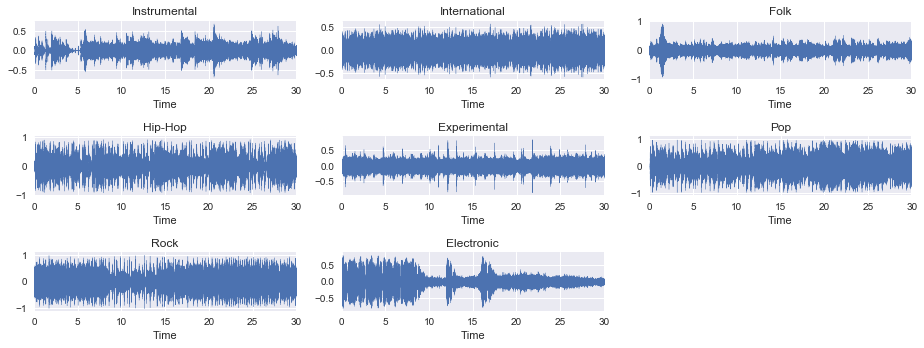

In [193]:
for i, x in enumerate(Xs):
    plt.subplot(3, 3, i+1)
    plt.title(genre_list[i])
    librosa.display.waveplot(x, sr=sample_rates[i])

plt.tight_layout()
plt.show()

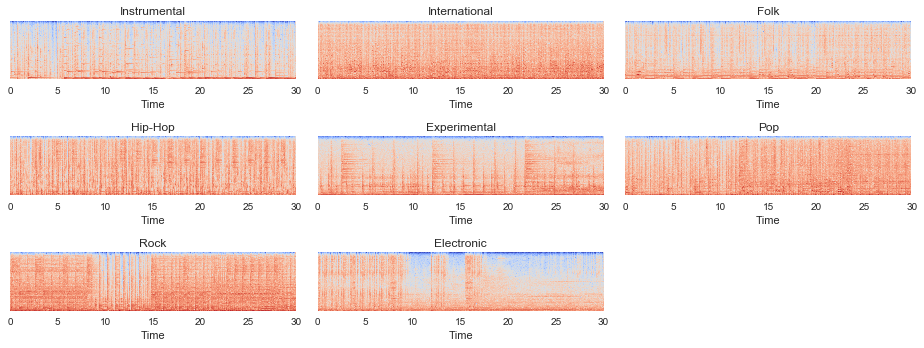

In [200]:
for i, x in enumerate(Xs):
    plt.subplot(3, 3, i+1)
    plt.title(genre_list[i])
    
    X = librosa.stft(x)
    Xmag = librosa.logamplitude(X)
    librosa.display.specshow(Xmag, sr=sample_rates[i], x_axis='time') #y_axis='log')
    

plt.tight_layout()
plt.show()

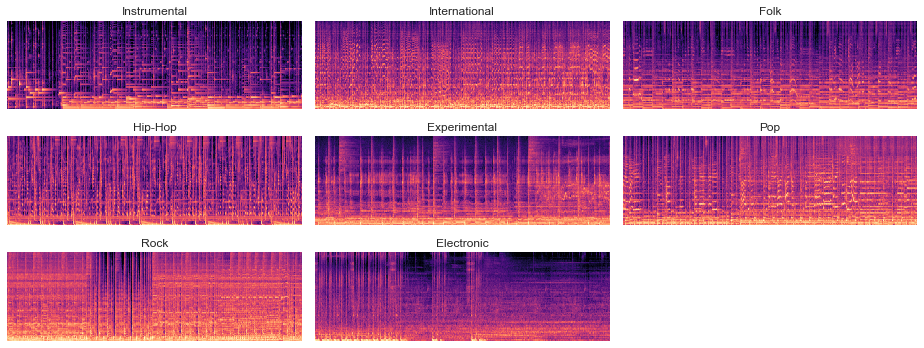

In [217]:
for i, x in enumerate(Xs):
    plt.subplot(3, 3, i+1)
    plt.title(genre_list[i])
    
    
    S = librosa.feature.melspectrogram(y=x, sr=sample_rates[i], n_mels=128,  fmax=8000)
    librosa.display.specshow(librosa.power_to_db(S,ref=np.max), sr=sample_rates[i]) #y_axis='off',x_axis='off',sr=sr)
    

plt.tight_layout()
plt.show()

### Just for one song

In [47]:
music_id = 5

In [48]:
tracks["track"].loc[music_id]

bit_rate                                                    256000
comments                                                         0
composer                                                       NaN
date_created                                   2008-11-26 01:48:20
date_recorded                                  2008-11-26 00:00:00
duration                                                       206
favorites                                                        6
genre_top                                                  Hip-Hop
genres                                                        [21]
genres_all                                                    [21]
information                                                    NaN
interest                                                      1933
language_code                                                   en
license          Attribution-NonCommercial-ShareAlike 3.0 Inter...
listens                                                       

In [50]:
sample_audio = utils.get_audio_path(AUDIO_DIR, music_id)
x, sr = librosa.load(sample_audio)

In [51]:
ipd.Audio(x, rate = sr)

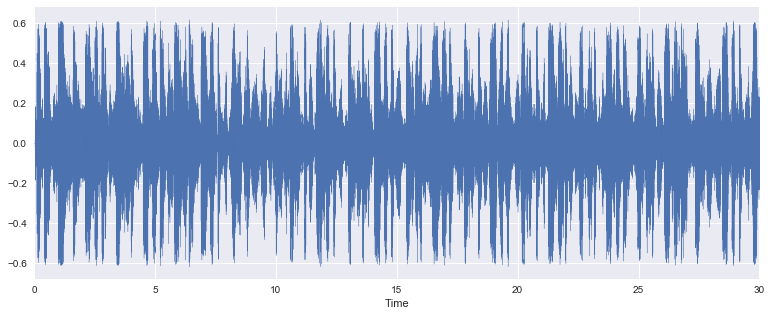

In [52]:
librosa.display.waveplot(x, sr=sr)

In [35]:
X = librosa.stft(x)

(1025, 1291)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


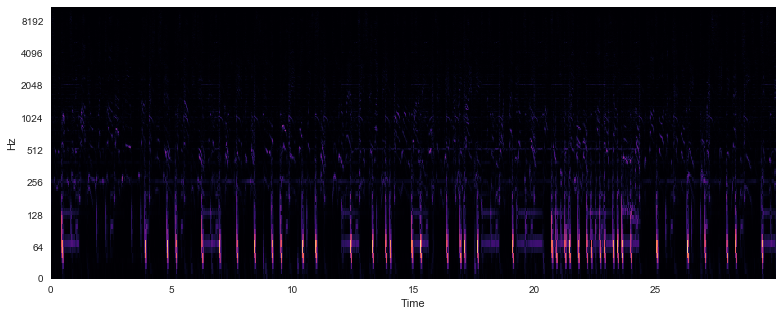

In [36]:
librosa.display.specshow(X, sr=sr, x_axis='time', y_axis='log')

In [46]:
#librosa.display.specshow(np.real(X), sr=sr, x_axis='time', y_axis='log')

In [45]:
#librosa.display.specshow(np.imag(X), sr=sr, x_axis='time', y_axis='log')

In [37]:
Xmag = librosa.logamplitude(X)

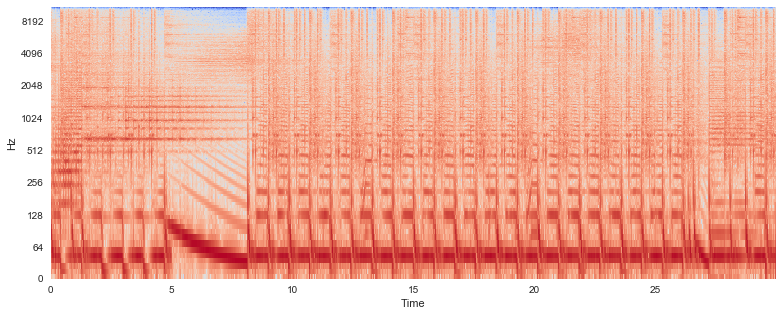

In [181]:
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log')

In [55]:
onset_frames = librosa.onset.onset_detect(x, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
#onset_samples = librosa.frames_to_samples(onset_frames)

In [56]:
clicks = librosa.clicks(times=onset_times, length=len(x))

In [58]:
ipd.Audio(x+clicks, rate=sr)

In [211]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,  fmax=8000)

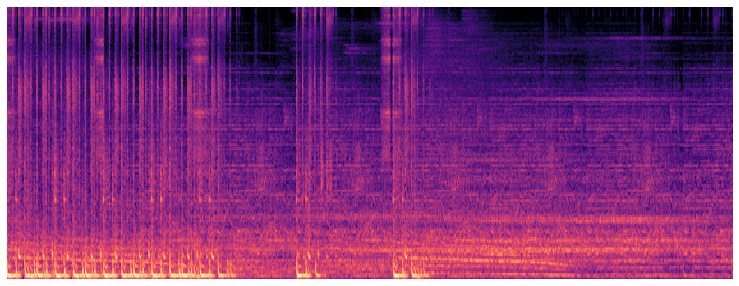

In [212]:
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='off',x_axis='off',sr=sr)